In [1]:
import pandas as pd
import numpy as np

In [2]:
suffix = '2019_Feb_28'
df = pd.read_csv('data/kaiterra_fieldeggid_15min_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)
df.sort_index(inplace=True)

In [3]:
# insert a column for day
dt_index = df.index.get_level_values(1)
df['date'] = dt_index.strftime('%Y-%m-%d')
df

latitude  longitude        location  \
field_egg_id timestamp_round                                             
113E         2018-03-01 00:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 00:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 00:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 00:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 01:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 01:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 01:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 01:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 02:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 02:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 02:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 02:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 03:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 03:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 03:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 03:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 04:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 04:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 04:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 04:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 05:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 05:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 05:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 05:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 06:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 06:15:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 06:30:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 06:45:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 07:00:00  28.545186  77.245890  Shubhra Mittal   
             2018-03-01 07:15:00  28.545186  77.245890  Shubhra Mittal   
...                                     ...        ...             ...   
EAC8         2019-02-28 16:30:00  28.539472  77.186686             IGC   
             2019-02-28 16:45:00  28.539472  77.186686             IGC   
             2019-02-28 17:00:00  28.539472  77.186686             IGC   
             2019-02-28 17:15:00  28.539472  77.186686             IGC   
             2019-02-28 17:30:00  28.539472  77.186686             IGC   
             2019-02-28 17:45:00  28.539472  77.186686             IGC   
             2019-02-28 18:00:00  28.539472  77.186686             IGC   
             2019-02-28 18:15:00  28.539472  77.186686             IGC   
             2019-02-28 18:30:00  28.539472  77.186686             IGC   
             2019-02-28 18:45:00  28.539472  77.186686             IGC   
             2019-02-28 19:00:00  28.539472  77.186686             IGC   
             2019-02-28 19:15:00  28.539472  77.186686             IGC   
             2019-02-28 19:30:00  28.539472  77.186686             IGC   
             2019-02-28 19:45:00  28.539472  77.186686             IGC   
             2019-02-28 20:00:00  28.539472  77.186686             IGC   
             2019-02-28 20:15:00  28.539472  77.186686             IGC   
             2019-02-28 20:30:00  28.539472  77.186686             IGC   
             2019-02-28 20:45:00  28.539472  77.186686             IGC   
             2019-02-28 21:00:00  28.539472  77.186686             IGC   
             2019-02-28 21:15:00  28.539472  77.186686             IGC   
             2019-02-28 21:30:00  28.539472  77.186686             IGC   
             2019-02-28 21:45:00  28.53

In [4]:
grouped = df.groupby('date')

testdays = []

for dayno, (date, group) in enumerate(grouped, 1):
    if dayno % 5 == 0:
        validcounts_day = group.groupby(level=0).pm25.count()
        validcounts_day.sort_values(ascending=False, inplace=True)
        validcounts_day_pos = validcounts_day[validcounts_day > 0]
        
        testdays.append((date, validcounts_day.sum(), validcounts_day_pos.size, validcounts_day_pos.index.values, validcounts_day_pos.values))

In [5]:
print(len(testdays))
testdays

73


[('2018-03-05', 0, 0, array([], dtype=object), array([], dtype=int64)),
 ('2018-03-10', 0, 0, array([], dtype=object), array([], dtype=int64)),
 ('2018-03-15', 96, 1, array(['CBC7'], dtype=object), array([96])),
 ('2018-03-20', 0, 0, array([], dtype=object), array([], dtype=int64)),
 ('2018-03-25', 96, 1, array(['CBC7'], dtype=object), array([96])),
 ('2018-03-30',
  192,
  2,
  array(['E47A', 'CBC7'], dtype=object),
  array([96, 96])),
 ('2018-04-04',
  288,
  3,
  array(['E47A', 'CBC7', '5D7A'], dtype=object),
  array([96, 96, 96])),
 ('2018-04-09',
  473,
  6,
  array(['D804', 'CBC7', 'BFDC', 'BC46', 'BB4A', '91B8'], dtype=object),
  array([96, 96, 96, 70, 65, 50])),
 ('2018-04-14',
  384,
  4,
  array(['C0A7', 'BC46', 'BB4A', '5D7A'], dtype=object),
  array([96, 96, 96, 96])),
 ('2018-04-19',
  667,
  7,
  array(['D804', 'C0A7', 'BFDC', 'BC46', 'BB4A', '5D7A', '72CA'],
        dtype=object),
  array([96, 96, 96, 96, 96, 96, 91])),
 ('2018-04-24',
  480,
  5,
  array(['C0A7', 'BFDC'

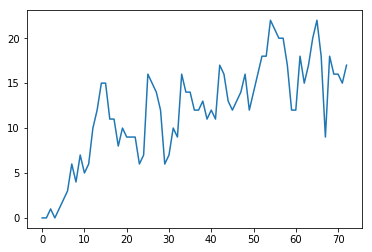

In [7]:
from operator import itemgetter
import matplotlib.pyplot as plt

counts_test = map(itemgetter(2), testdays)
plt.plot(list(counts_test))
plt.show()

In [48]:
seed = 9
np.random.seed(seed)

testdays_select = []
totalcount = 0
for tup in testdays:
    num, ids, counts = tup[2:]
    num_select = int(num / 2)
    num_nonselect = num - num_select
    if num_select == 0:
        testdays_select.append((tup[0], 0, [], [], num_nonselect, ids, counts))
    else:
        indices = np.arange(len(ids))
        indices_select = np.random.choice(indices, num_select, replace=False)
        indices_nonselect = np.setdiff1d(indices, indices_select)
        totalcount += counts[indices_select].sum()
        testdays_select.append((tup[0], num_select, ids[indices_select], counts[indices_select], 
                               num_nonselect, ids[indices_nonselect], counts[indices_nonselect]))

print(totalcount)
testdays_select

37351


[('2018-03-05', 0, [], [], 0, array([], dtype=object), array([], dtype=int64)),
 ('2018-03-10', 0, [], [], 0, array([], dtype=object), array([], dtype=int64)),
 ('2018-03-15', 0, [], [], 1, array(['CBC7'], dtype=object), array([96])),
 ('2018-03-20', 0, [], [], 0, array([], dtype=object), array([], dtype=int64)),
 ('2018-03-25', 0, [], [], 1, array(['CBC7'], dtype=object), array([96])),
 ('2018-03-30',
  1,
  array(['CBC7'], dtype=object),
  array([96]),
  1,
  array(['E47A'], dtype=object),
  array([96])),
 ('2018-04-04',
  1,
  array(['CBC7'], dtype=object),
  array([96]),
  2,
  array(['E47A', '5D7A'], dtype=object),
  array([96, 96])),
 ('2018-04-09',
  3,
  array(['BB4A', 'CBC7', 'BFDC'], dtype=object),
  array([65, 96, 96]),
  3,
  array(['D804', 'BC46', '91B8'], dtype=object),
  array([96, 70, 50])),
 ('2018-04-14',
  2,
  array(['5D7A', 'C0A7'], dtype=object),
  array([96, 96]),
  2,
  array(['BC46', 'BB4A'], dtype=object),
  array([96, 96])),
 ('2018-04-19',
  3,
  array(['BB4

In [31]:
df_testdays = pd.DataFrame(index=pd.Index(list(map(itemgetter(0), testdays)), name='date'), columns=df.index.levels[0])
df_testdays

field_egg_id,113E,1FD7,20CA,2E9C,3ACF,498F,4BE7,56C3,5D7A,603A,...,BFDC,C0A7,CBC7,D804,DF07,E1F8,E47A,E486,E8E4,EAC8
date,,,,,,,,,,,,,,,,,,,,,
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
for tup in testdays_select:
    df_testdays.loc[tup[0], tup[2]] = 1
    df_testdays.loc[tup[0], tup[5]] = 0
df_testdays

field_egg_id,113E,1FD7,20CA,2E9C,3ACF,498F,4BE7,56C3,5D7A,603A,...,BFDC,C0A7,CBC7,D804,DF07,E1F8,E47A,E486,E8E4,EAC8
date,,,,,,,,,,,,,,,,,,,,,
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_testdays.sum(axis=1)

date
2018-03-05     0.0
2018-03-10     0.0
2018-03-15     0.0
2018-03-20     0.0
2018-03-25     0.0
2018-03-30     1.0
2018-04-04     1.0
2018-04-09     3.0
2018-04-14     2.0
2018-04-19     3.0
2018-04-24     2.0
2018-04-29     3.0
2018-05-04     5.0
2018-05-09     6.0
2018-05-14     7.0
2018-05-19     7.0
2018-05-24     5.0
2018-05-29     5.0
2018-06-03     4.0
2018-06-08     5.0
2018-06-13     4.0
2018-06-18     4.0
2018-06-23     4.0
2018-06-28     3.0
2018-07-03     3.0
2018-07-08     8.0
2018-07-13     7.0
2018-07-18     7.0
2018-07-23     6.0
2018-07-28     3.0
              ... 
2018-10-06     8.0
2018-10-11     6.0
2018-10-16     6.0
2018-10-21     6.0
2018-10-26     7.0
2018-10-31     8.0
2018-11-05     6.0
2018-11-10     7.0
2018-11-15     8.0
2018-11-20     9.0
2018-11-25     9.0
2018-11-30    11.0
2018-12-05    10.0
2018-12-10    10.0
2018-12-15    10.0
2018-12-20     8.0
2018-12-25     6.0
2018-12-30     6.0
2019-01-04     9.0
2019-01-09     7.0
2019-01-14     8.0
2019-01

In [34]:
df_testdays.to_csv('data/testdays_kaiterra_15min_2019_Feb_28_seed{}.csv'.format(seed))